<a href="https://colab.research.google.com/github/Mehedihasan097/Financial-Engineering/blob/main/Derivative_Pricing_Monte_Carlo_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1**

**5.	Pricing an ATM European Call and Put Using Monte Carlo Simulation**

a.	Here, to find out the optimal number of Monte Carlo Simulations, we need to determine the point at which increasing the number of simulations no longer significantly changes the option price. This ensures that the computed price converges to a stable value without unnecessary computational overhead. Here we develop a convergence checking mechanism and recommender system for optimal number of simulations. A convergence check is performed by comparing the absolute difference between successive option prices. If the change between two successive prices is less than the specified tolerance (0.01), the mechanism considers the option price to have converged. The number of simulations at which this condition is first met is recorded as optimal simulation count.

b.	In Monte Carlo approach, we simulate the path of the underlying asset price over time using a continuous-time framework. We consider crucial parameters such as the number of simulations (num_simulations = 80,000) and time steps (num_days = 63, corresponding to daily time steps over 3 months) are chosen to provide a balance between accuracy and computational efficiency. Daily time steps provide a realistic granularity for modeling the path of the stock price and the number of simulation ensure that the Monte Carlo estimate of the option price converges to a reliable value. For each simulation, the stock price path is generated using Geometric Brownian Motion (GBM). GBM assumes the stock price follows the equation:
dSt = St(μdt + σ dWt)

 where dWt represents a Wiener process, μ is the drift, and σ is the volatility.


For each simulation, the final stock price St s used to calculate the payoff of the option and The average payoff from all simulations is discounted back to the present value using the risk-free rate.

Call Option Price with 1000 simulations: 4.1763
Call Option Price with 5000 simulations: 4.7016
Call Option Price with 10000 simulations: 4.8122
Call Option Price with 20000 simulations: 4.5951
Call Option Price with 40000 simulations: 4.6184
Call Option Price with 60000 simulations: 4.6048
Call Option Price with 80000 simulations: 4.6036


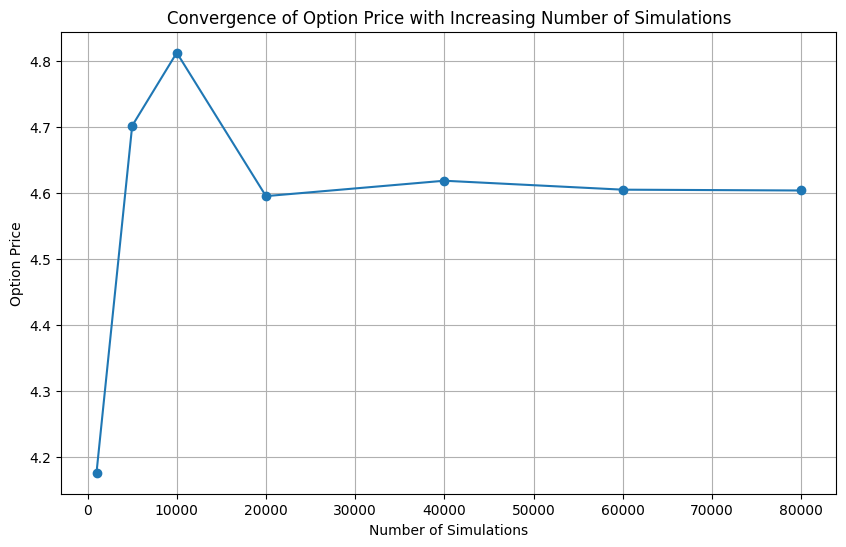


Recommended number of simulations for convergence: 80000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price (ATM)
r = 0.05      # Risk-free rate (5%)
sigma = 0.20  # Volatility (20%)
T = 3 / 12    # Maturity in years (3 months)
num_days = 63 # Daily time steps (3 months ≈ 63 days)
tolerance = 0.01  # Tolerance level for convergence

# Monte Carlo simulation for European option pricing
def monte_carlo_option_pricing(S0, K, r, sigma, T, num_days, num_simulations, option_type="call"):
    dt = T / num_days
    payoff_sum = 0

    for _ in range(num_simulations):
        # Simulate daily stock prices using GBM
        S_t = S0
        for _ in range(num_days):
            Z = np.random.normal(0, 1)
            S_t *= np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

        # Calculate payoff at maturity
        if option_type == "call":
            payoff_sum += max(S_t - K, 0)
        elif option_type == "put":
            payoff_sum += max(K - S_t, 0)

    # Calculate the discounted option price
    option_price = (payoff_sum / num_simulations) * np.exp(-r * T)
    return option_price

# List to store results
simulation_counts = [1000, 5000, 10000, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 150000]
option_prices = []

# Check convergence
optimal_simulation_count = None
for i, num_simulations in enumerate(simulation_counts):
    call_price = monte_carlo_option_pricing(S0, K, r, sigma, T, num_days, num_simulations, option_type="call")
    option_prices.append(call_price)
    print(f"Call Option Price with {num_simulations} simulations: {round(call_price, 4)}")

    # Check for convergence with the specified tolerance level
    if i > 0 and abs(option_prices[i] - option_prices[i - 1]) < tolerance:
        optimal_simulation_count = num_simulations
        break

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(simulation_counts[:len(option_prices)], option_prices, marker='o', linestyle='-')
plt.title('Convergence of Option Price with Increasing Number of Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

# Recommend optimal number of simulations
if optimal_simulation_count:
    print(f"\nRecommended number of simulations for convergence: {optimal_simulation_count}")
else:
    print("\nConvergence not reached within the tested simulation counts.")

In [ ]:
import numpy as np

# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price (ATM)
r = 0.05      # Risk-free rate (5%)
sigma = 0.20  # Original volatility (20%)
T = 3 / 12    # Maturity in years (3 months)
num_days = 63 # Daily time steps (252 trading days in a year, 3 months ≈ 63 days)
num_simulations = 80000  # Number of Monte Carlo simulations
delta_S = 1   # Change in stock price for Delta calculation
delta_sigma = 0.05  # Change in volatility for Vega calculation

# Monte Carlo simulation for European option pricing
def monte_carlo_option_pricing(S0, K, r, sigma, T, num_days, num_simulations, option_type="call"):
    dt = T / num_days
    payoff_sum = 0

    for _ in range(num_simulations):
        # Simulate daily stock prices using GBM
        S_t = S0
        for _ in range(num_days):
            Z = np.random.normal(0, 1)
            S_t *= np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

        # Calculate payoff at maturity
        if option_type == "call":
            payoff_sum += max(S_t - K, 0)
        elif option_type == "put":
            payoff_sum += max(K - S_t, 0)

    # Calculate the discounted option price
    option_price = (payoff_sum / num_simulations) * np.exp(-r * T)
    return option_price

In [ ]:
# 5. Price ATM European call and put options
call_price = monte_carlo_option_pricing(S0, K, r, sigma, T, num_days, num_simulations, option_type="call")
put_price = monte_carlo_option_pricing(S0, K, r, sigma, T, num_days, num_simulations, option_type="put")

print(f"ATM European Call Option Price: {round(call_price, 4)}")
print(f"ATM European Put Option Price: {round(put_price, 4)}")

ATM European Call Option Price: 4.5798
ATM European Put Option Price: 3.3789


6.	In Monte Carlo simulations, Delta can be approximated using the finite difference method. This involves pricing the option at slightly higher and lower prices of the underlying asset and then calculating the difference between these prices.
A positive delta for a call option means that as the stock price increases, the call option becomes more valuable. As the delta is 0.5781 for the call option, the holder benefits when the underlying asset price rises. A negative Delta for a put option means that as the stock price increases, the put option becomes less valuable. As the delta is -0.4464, the holder benefits when the underlying asset price falls.


In [ ]:
# 6. Compute Greek Delta for the European call and put at time 0
# Price options with S0 + delta_S
call_price_up = monte_carlo_option_pricing(S0 + delta_S, K, r, sigma, T, num_days, num_simulations, option_type="call")
put_price_up = monte_carlo_option_pricing(S0 + delta_S, K, r, sigma, T, num_days, num_simulations, option_type="put")

# Price options with S0 - delta_S
call_price_down = monte_carlo_option_pricing(S0 - delta_S, K, r, sigma, T, num_days, num_simulations, option_type="call")
put_price_down = monte_carlo_option_pricing(S0 - delta_S, K, r, sigma, T, num_days, num_simulations, option_type="put")

# Delta calculation
delta_call = (call_price_up - call_price_down) / (2 * delta_S)
delta_put = (put_price_up - put_price_down) / (2 * delta_S)

print(f"Delta for European Call Option: {round(delta_call, 4)}")
print(f"Delta for European Put Option: {round(delta_put, 4)}")

Delta for European Call Option: 0.5781
Delta for European Put Option: -0.4464


7.	With the results:
•	European Call Option:

•	Original Call Price at 20% Volatility: 4.592

•	Increased Call Price at 25% Volatility: 5.607

•	Vega for the Call Option: 20.3047

•	European Put Option:

•	Original Put Price at 20% Volatility: 3.3591

•	Increased Put Price at 25% Volatility: 4.3453

•	Vega for the Put Option: 19.7232

The Vega values show how sensitive each option's price is to changes in volatility. For both call and put options:

•	Call Vega: 20.3047

•	Put Vega: 19.7232

This means that:

•	For a 5% increase in volatility (from 20% to 25%), the call option price increased by about $1.105 (from $4.592 to $5.607).

•	The put option price increased by about $0.9862 as well(from $3.3591 to $4.3453).

These results show that both the European call and put options become more valuable as volatility increases.


In [ ]:
# 7. Compute Vega (Sensitivity to Volatility)
## Original prices with 20% volatility
call_price = monte_carlo_option_pricing(S0, K, r, sigma, T, num_days, num_simulations, option_type="call")
put_price = monte_carlo_option_pricing(S0, K, r, sigma, T, num_days, num_simulations, option_type="put")

# Prices with increased volatility (25%)
call_price_vol_increase = monte_carlo_option_pricing(S0, K, r, sigma + delta_sigma, T, num_days, num_simulations, option_type="call")
put_price_vol_increase = monte_carlo_option_pricing(S0, K, r, sigma + delta_sigma, T, num_days, num_simulations, option_type="put")

# Vega calculation
vega_call = (call_price_vol_increase - call_price) / delta_sigma
vega_put = (put_price_vol_increase - put_price) / delta_sigma

# Print results
print(f"Original Call Price at 20% Volatility: {round(call_price, 4)}")
print(f"Increased Call Price at 25% Volatility: {round(call_price_vol_increase, 4)}")
print(f"Vega for the Call Option: {round(vega_call, 4)}\n")

print(f"Original Put Price at 20% Volatility: {round(put_price, 4)}")
print(f"Increased Put Price at 25% Volatility: {round(put_price_vol_increase, 4)}")
print(f"Vega for the Put Option: {round(vega_put, 4)}")

Original Call Price at 20% Volatility: 4.592
Increased Call Price at 25% Volatility: 5.6072
Vega for the Call Option: 20.3047

Original Put Price at 20% Volatility: 3.3591
Increased Put Price at 25% Volatility: 4.3453
Vega for the Put Option: 19.7232


**Step 2**

**5.  Pricing an ATM American Put Using Monte Carlo Simulation**

In this step, our formulated function simulates daily paths for the stock price using Geometric Brownian Motion. At each time step, the intrinsic value is compared with the discounted value from future steps. The option value at each step is determined by taking the maximum of these two, which models the early exercise feature of American options.


In [ ]:
import numpy as np
# Parameters
S0 = 100      # Initial stock price
K = 100       # Strike price (ATM)
r = 0.05      # Risk-free rate (5%)
sigma = 0.20  # Original volatility (20%)
T = 3 / 12    # Maturity in years (3 months)
num_days = 63 # Daily time steps (252 trading days in a year, 3 months ≈ 63 days)
num_simulations = 80000  # Number of Monte Carlo simulations
delta_S = 1   # Change in stock price for Delta calculation
delta_sigma = 0.05  # Change in volatility for Vega calculation

# Monte Carlo simulation for American put option pricing with early exercise
def monte_carlo_american_put_pricing(S0, K, r, sigma, T, num_days, num_simulations):
    dt = T / num_days
    option_values = []

    for _ in range(num_simulations):
        # Simulate daily stock prices using GBM
        S_t_path = [S0]
        for _ in range(1, num_days + 1):
            Z = np.random.normal(0, 1)
            S_t = S_t_path[-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            S_t_path.append(S_t)

        # Calculate option value at each step with the possibility of early exercise
        put_values = [max(K - S, 0) for S in S_t_path]
        discounted_put_values = [put_values[-1]]  # Start with the terminal payoff

        for i in range(num_days - 1, -1, -1):
            intrinsic_value = max(K - S_t_path[i], 0)
            discounted_value = np.exp(-r * dt) * discounted_put_values[-1]
            # Apply early exercise condition
            discounted_put_values.append(max(intrinsic_value, discounted_value))

        # Store the value at time 0
        option_values.append(discounted_put_values[-1])

    # Calculate the average option price
    american_put_price = np.mean(option_values) * np.exp(-r * T)
    return american_put_price


In [ ]:
# 5. Price ATM American put option
american_put_price = monte_carlo_american_put_pricing(S0, K, r, sigma, T, num_days, num_simulations)
print(f"ATM American Put Option Price: {round(american_put_price, 4)}")

ATM American Put Option Price: 6.3894


6. The output we obtained of Delta for American Put Option is -0.8682, indicates that for every 1 increase in the underlying stock price, the price of the American put option is expected to decrease by approximately 0.87. And the negative sign reflects the nature of put options: as the underlying asset price increases, the value of the put option typically decreases, which aligns with the fundamental behavior of put options. Overall, the American put option is quite sensitive to changes in the underlying asset price, and a decrease in the asset price would increase the option's value, as expected.

In [ ]:
# 6. Compute Greek Delta for the American put at time 0
# Price option with S0 + delta_S
put_price_up = monte_carlo_american_put_pricing(S0 + delta_S, K, r, sigma, T, num_days, num_simulations)

# Price option with S0 - delta_S
put_price_down = monte_carlo_american_put_pricing(S0 - delta_S, K, r, sigma, T, num_days, num_simulations)

# Delta calculation
delta_put = (put_price_up - put_price_down) / (2 * delta_S)
print(f"Delta for American Put Option: {round(delta_put, 4)}")


Delta for American Put Option: -0.8682


7. The output we obtained:

•	American Put Option:

•	Original Put Price at 20% Volatility: 6.3819

•	Increased Put Price at 25% Volatility: 8.0846

•	Vega for the Put Option: 34.0553

The increase in the American put option's price from 6.3819 to $8.0846 due to a 5% increase in volatility aligns with the nature of options—where higher volatility increases the chance of more significant price movements and potential profits. Whereas, a high Vega value, such as 34.0553, suggests that the option's price is highly responsive to changes in volatility. This reflects that if the market expects more volatility in the future, the price of the option will increase significantly.


In [ ]:
# 7. Compute Vega (Sensitivity to Volatility)
# Original price at 20% volatility
put_price = monte_carlo_american_put_pricing(S0, K, r, sigma, T, num_days, num_simulations)

# Price with increased volatility (25%)
put_price_vol_increase = monte_carlo_american_put_pricing(S0, K, r, sigma + delta_sigma, T, num_days, num_simulations)

# Vega calculation
vega_put = (put_price_vol_increase - put_price) / delta_sigma

# Print results
print(f"Original Put Price at 20% Volatility: {round(put_price, 4)}")
print(f"Increased Put Price at 25% Volatility: {round(put_price_vol_increase, 4)}")
print(f"Vega for the American Put Option: {round(vega_put, 4)}")

Original Put Price at 20% Volatility: 6.3819
Increased Put Price at 25% Volatility: 8.0846
Vega for the American Put Option: 34.0553


**Step 3**

In this step, the Up-and-Out barrier feature introduces a significant risk that the option will become worthless if the underlying price breaches the barrier. This explains the low value for the call option and the higher value for the put option, reflecting the underlying probability of price paths remaining valid until maturity.

Here Monte Carlo methods are used to simulate the price paths of the underlying asset using GBM. If the underlying asset's price hits or exceeds the barrier level of 141, the option is knocked out and becomes worthless, regardless of where the price ends at maturity. During each path simulation, the code checks if the stock price hits or exceeds the barrier level at any point. If it does, that specific path results in a payoff of zero for both call and put options.
Here we obtained the call option price 0.7042. The relatively low price indicates that the likelihood of the underlying asset reaching or exceeding the barrier level (141) is significant, limiting the number of valid paths that contribute to a non-zero payoff. This results in a lower value for the Up-and-Out barrier call option.

On the other hand, the put option price we obtained 8.413. The higher price for the put option suggests that, while the barrier condition still applies, there is a greater likelihood of the underlying asset remaining below the strike price at maturity without breaching the barrier, allowing more valid paths to contribute to the payoff.


In [ ]:
import numpy as np

# Parameters
S0 = 120       # Initial stock price
K = 120        # Strike price (ATM)
r = 0.06       # Risk-free rate (6%)
sigma = 0.30   # Volatility (30%)
T = 8 / 12     # Maturity in years (8 months)
num_days = int(252 * (8 / 12))  # Daily time steps (approximation for 8 months)
num_simulations = 80000        # Number of Monte Carlo simulations
barrier = 141  # Barrier level

# Monte Carlo simulation for Up-and-Out barrier options
def monte_carlo_uoa_option(S0, K, r, sigma, T, num_days, num_simulations, barrier, option_type="call"):
    dt = T / num_days
    payoff_sum = 0

    for _ in range(num_simulations):
        # Simulate daily stock prices using GBM
        S_t = S0
        barrier_breached = False
        for _ in range(num_days):
            Z = np.random.normal(0, 1)
            S_t *= np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            if S_t >= barrier:
                barrier_breached = True
                break

        # Calculate payoff at maturity only if the barrier was not breached
        if not barrier_breached:
            if option_type == "call":
                payoff_sum += max(S_t - K, 0)
            elif option_type == "put":
                payoff_sum += max(K - S_t, 0)

    # Calculate the discounted option price
    option_price = (payoff_sum / num_simulations) * np.exp(-r * T)
    return option_price

# Price the Up-and-Out call and put options
uoa_call_price = monte_carlo_uoa_option(S0, K, r, sigma, T, num_days, num_simulations, barrier, option_type="call")
uoa_put_price = monte_carlo_uoa_option(S0, K, r, sigma, T, num_days, num_simulations, barrier, option_type="put")

# Print results
print(f"Up-and-Out Barrier Call Option Price: {round(uoa_call_price, 4)}")
print(f"Up-and-Out Barrier Put Option Price: {round(uoa_put_price, 4)}")

Up-and-Out Barrier Call Option Price: 0.7042
Up-and-Out Barrier Put Option Price: 8.413
